# UNIVARIATE ANALYSIS

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('feature_engineered_gurgaon.csv')

In [3]:
df.head()

,property_type,sector,society,price,area,price_per_sqft,built_up_area,carpet_area,super_built_up_area,bedRoom,...,floorNum,facing,agePossession,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 86,ansal heights 86,0.78,1360.0,5735.0,1360.0,NaN,NaN,2,...,8.0,North,New Property,0,0,0,0,0,1,72
1,flat,sector 103,indiabulls centrum park,1.05,1792.0,5861.0,1365.0,900.0,NaN,2,...,1.0,West,Relatively New,0,0,0,0,0,2,51
2,flat,sector 70a,bptp astaire gardens,0.97,1473.0,6587.0,NaN,NaN,1480.0,3,...,1.0,West,Relatively New,0,0,0,0,1,1,149
3,flat,sector 69,tulip violet,2.05,2060.0,9950.0,NaN,NaN,2087.0,4,...,0.0,North-West,Relatively New,0,0,0,0,0,1,157
4,house,sector 56,independent,12.39,2700.0,45889.0,2700.0,NaN,NaN,16,...,4.0,North-East,New Property,0,1,0,1,0,2,49


In [4]:
df.shape

(3803, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   sector               3803 non-null   object 
 2   society              3802 non-null   object 
 3   price                3785 non-null   float64
 4   area                 3785 non-null   float64
 5   price_per_sqft       3785 non-null   float64
 6   built_up_area        1733 non-null   float64
 7   carpet_area          1944 non-null   float64
 8   super_built_up_area  1915 non-null   float64
 9   bedRoom              3803 non-null   int64  
 10  bathroom             3803 non-null   int64  
 11  balcony              3803 non-null   object 
 12  floorNum             3784 non-null   float64
 13  facing               2698 non-null   object 
 14  agePossession        3803 non-null   object 
 15  study room           3803 non-null   i

In [6]:
df.duplicated().sum()

126

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(3677, 22)

# property_type

<Axes: xlabel='property_type'>

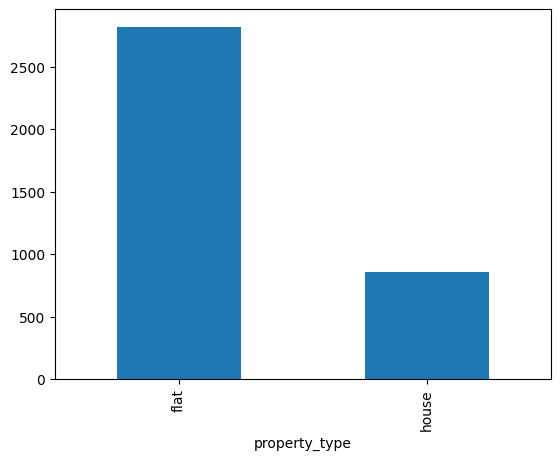

In [9]:
df['property_type'].value_counts().plot(kind='bar')

# society

In [10]:
df['society'].value_counts().shape

(676,)

In [11]:
df['society'].value_counts()

society
independent                             486
tulip violet                             75
ss the leaf                              73
dlf new town heights                     42
shapoorji pallonji joyville gurugram     42
                                       ... 
antriksh green                            1
unitech the palms                         1
supertech new soft launch                 1
independent house sector 45               1
emaar mgf palm terraces select            1
Name: count, Length: 676, dtype: int64

society column is with high cardinality

In [12]:
print(df['society'].shape)
print(df[df['society'] != 'independent']['society'].shape)

(3677,)
(3191,)


In [13]:
print(df['society'].value_counts().shape)
print(df[df['society'] != 'independent']['society'].value_counts(normalize=True).shape)

(676,)
(675,)


In [14]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().tail(600)

society
unitech uniworld resorts          0.509718
ireo the corridors                0.513480
breez global heights              0.516928
bestech park view sanskruti       0.520376
adani m2k oyster grande           0.523824
                                    ...   
antriksh green                    0.998746
unitech the palms                 0.999060
supertech new soft launch         0.999373
independent house sector 45       0.999687
emaar mgf palm terraces select    1.000000
Name: proportion, Length: 600, dtype: float64

- there are 486 rows of independent society itself
- there are 75 such apartments which belong to 50 percent of total data 
- and other 600 apartments which belong to other 50 percent of total data


In [15]:
# creatting bins based on number of flats in each apartment and accordingly putting it

society_counts = df['society'].value_counts()

# frequency distribution for societies
frequency_bins = {
    "Very high (>100)":(society_counts > 100).sum(),
    "High (50-100)":((society_counts>=50) & (society_counts<=100)).sum(),
    "Average (10-49)":((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)":((society_counts>1) & (society_counts<10)).sum(),
    "Very low (1)":(society_counts == 1).sum()
}

frequency_bins

{'Very high (>100)': 1,
 'High (50-100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 273,
 'Very low (1)': 308}

- there are in all 308 apartment which have only 1 record in the data 
- 273 apartments which have 2 to 9 rows or flats data in the total data 
- 92 apartments which have 10 to 49 rows or flats data in the total data
- 2 apartments/ society with high number of flats/ rows in the data
- only 1 apartment with over 100 flats in the total data

<Axes: xlabel='society'>

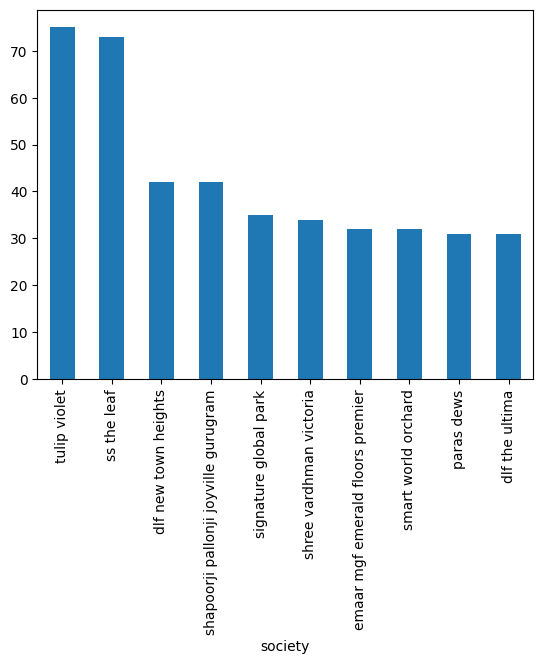

In [16]:
# top 10 societies

df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [17]:
df[df['society'].isnull()]

,property_type,sector,society,price,area,price_per_sqft,built_up_area,carpet_area,super_built_up_area,bedRoom,...,floorNum,facing,agePossession,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3594,flat,sector 78,NaN,0.6,1625.0,3692.0,1625.0,NaN,NaN,2,...,NaN,NaN,Under Construction,0,0,0,0,0,1,0


# sector

In [18]:
df['sector'].value_counts().shape

(113,)

sector column is with high cardinality

In [19]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 3,
 'High (50-100)': 25,
 'Average (10-49)': 63,
 'Low (2-9)': 21,
 'Very Low (1)': 1}

- There are a total of 113 unique sectors in the dataset.
- On categoriszing sectors into bins based on the number of rows belong to each sector

- Very High (>100): 3 sectors have more than 100 rows.
- High (50-100): 25 sectors have between 50 to 100 rows.
- Average (10-49): A majority, 63 sectors, fall in this range with 10 to 49 rows each.
- Low (2-9): 21 sectors have between 2 to 9 rows.
- Very Low (1): there is one sector with only 1 row.

# price - output column

In [20]:
df['price'].isnull().sum()

17

In [21]:
df['price'].describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

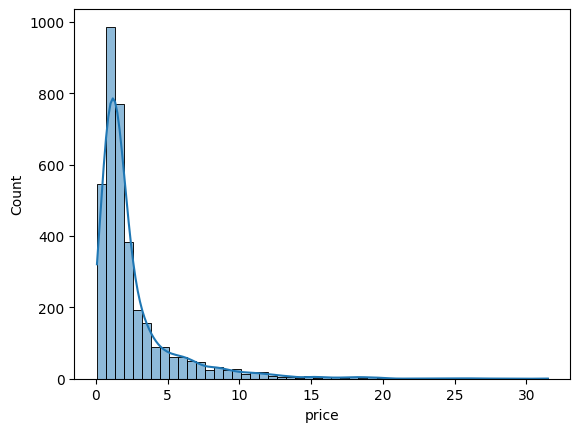

In [22]:
sns.histplot(df['price'],kde=True,bins=50)

<Axes: xlabel='price'>

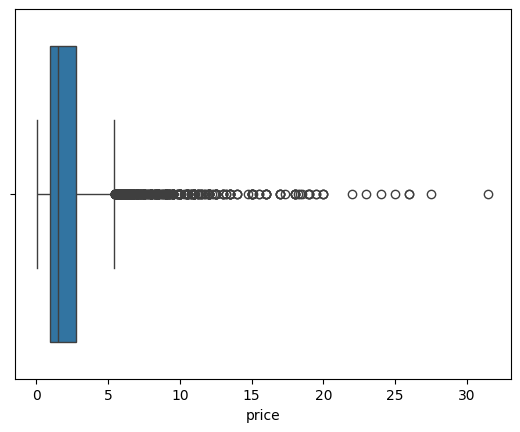

In [23]:
sns.boxplot(x=df['price'])

- Mean Price: The average price is approximately 2.53 crores.
- Median Price: The median (or 50th percentile) price is 1.52 crores.
- IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.

The box plot shows how rightly skewed the data is.

In [24]:
# skewness and kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

3.2791704733134623 14.933372629214258


kurtosis value is greater then 3 indicating distribution with heavier tails and more outliers compared to normal distribution

In [25]:
# Quantiles Analysis
quantiles = df['price'].quantile([0.01, 0.05,0.95,0.99])
quantiles

0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.264
Name: price, dtype: float64

- 1% Quantile: Only 1% of properties are priced below 0.25 crores.
- 5% Quantile: 5% of properties are priced below 0.37 crores.
- 95% Quantile: 95% of properties are priced below 8.5 crores.
- 99% Quantile: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.

In [26]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
iqr = Q3 - Q1

iqr

1.8

In [27]:
lower_bound = Q1 - 1.5 * iqr # min
upper_bound = Q3 + 1.5 * iqr # max

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [28]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(425, 22)

In [29]:
# description of outliers data
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

Outliers Analysis (using IQR method):

- Based on the IQR method, there are 425 properties considered as outliers.
- These outliers have an average price of approximately 9.24 crores.
- The range for these outliers is from 5.46 crores to 31.5 crores.

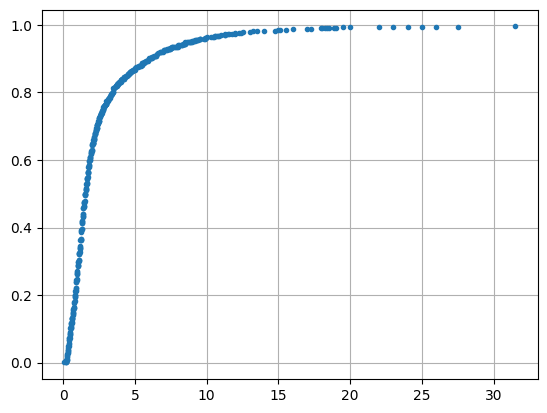

In [30]:
# ecdf plot

ecdf = df['price'].value_counts().sort_index().cumsum()/len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.',linestyle='none')
plt.grid()

- around 83 percentage of data is below 5 cr
- around 40 percentage of data is below 1.5 cr may be 

- since we have rightly skewed data we will apply log-transformation to it to convert it into normal distribution 

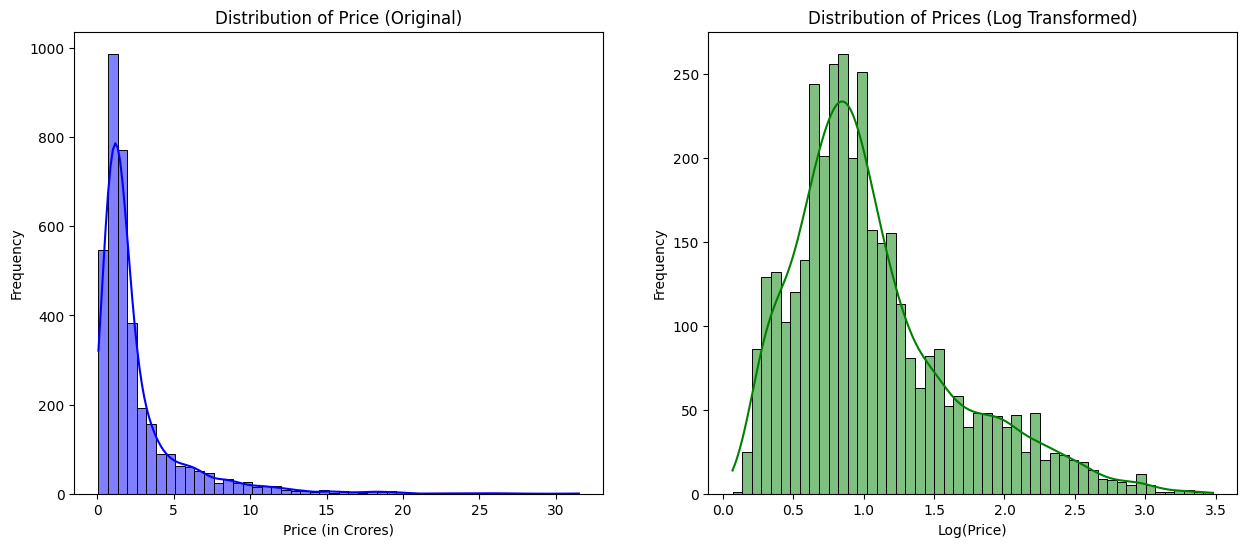

In [31]:
plt.figure(figsize=(15,6))

# Distribution plot without log transformation
plt.subplot(1,2,1)
sns.histplot(df['price'], kde=True, bins=50, color='blue')
plt.title('Distribution of Price (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation \
log_price = np.log1p(df['price'][df['price'] > 0])
plt.subplot(1,2,2)
sns.histplot(log_price, kde=True, bins=50, color='green')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.show()

In [32]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness, kurtosis)

1.0740709565255315 0.9646692415449274


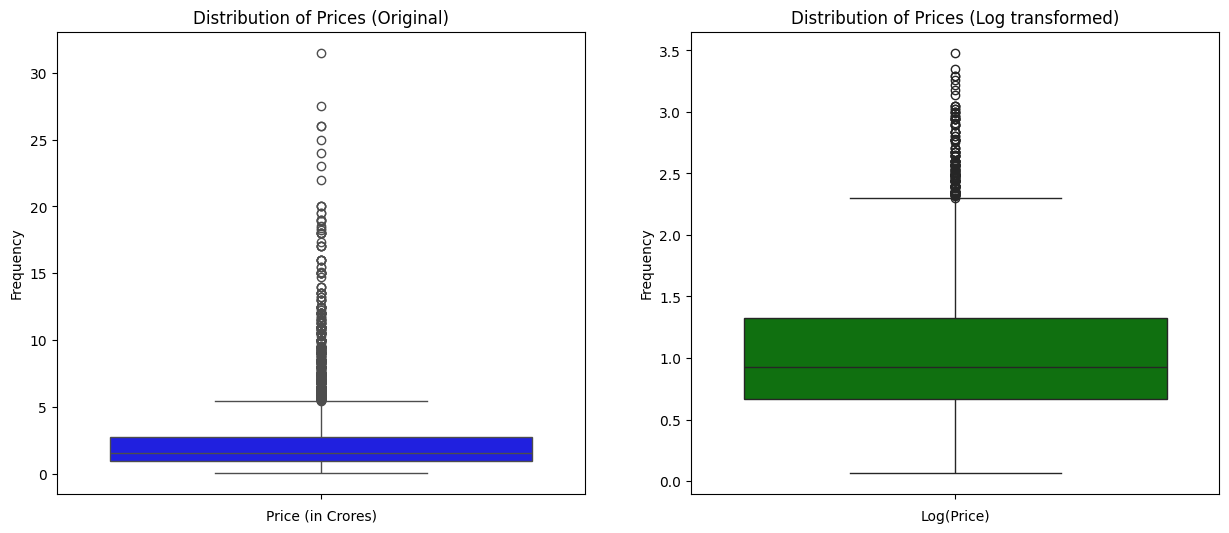

In [33]:
plt.figure(figsize=(15,6))

# Distribution plot without log transformation 
plt.subplot(1,2,1)
sns.boxplot(df['price'], color='blue')
plt.title("Distribution of Prices (Original)")
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')


# Distribution plot with log transformation
plt.subplot(1,2,2)
sns.boxplot(np.log1p(df['price']), color='green')
plt.title("Distribution of Prices (Log transformed)")
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.show()

- First of all our price (otput column) is highly right skewed with around 450 outliers (significant data)
- we applied log tranformation and tried converted to normal distribution

# price_per_sqft

In [34]:
df['price_per_sqft'].isnull().sum()

17

In [35]:
df['price_per_sqft'].describe()

count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

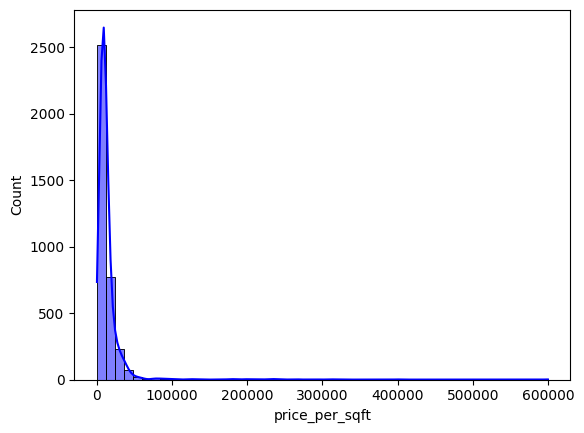

In [36]:
sns.histplot(df['price_per_sqft'], bins=50, color='blue',kde=True)

most properties have a price_per_sqft ranging between approximately 0 to 40000 rs. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft

<Axes: ylabel='price_per_sqft'>

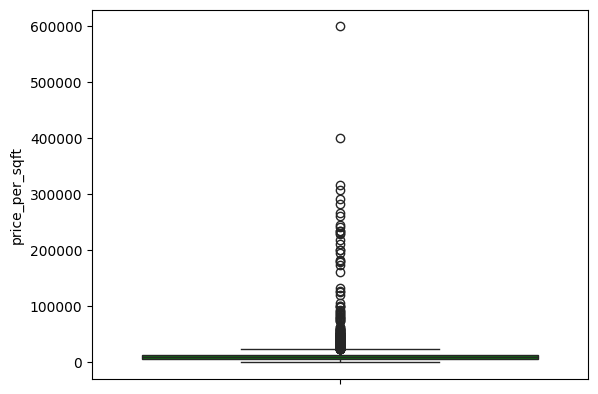

In [37]:
sns.boxplot(df['price_per_sqft'], color='green')

outliers on the upper are at veru high values which is practically not possible for gurgaon area

Observations: 
- Potential Outliers 
- Right Skewed
- 17 missing values


# bedRoom

In [38]:
df['bedRoom'].isnull().sum()

0

<Axes: xlabel='bedRoom'>

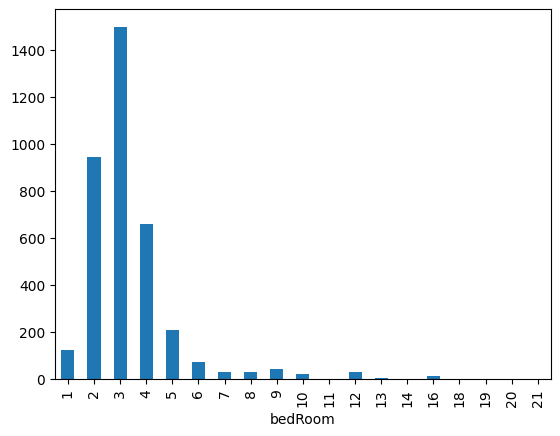

In [39]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

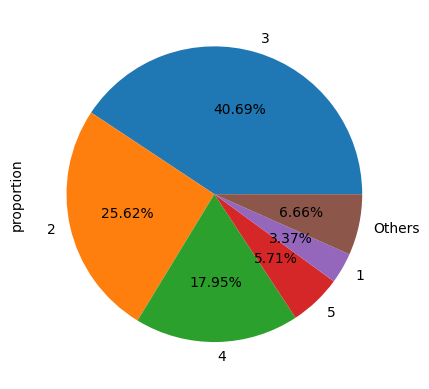

In [40]:
counts = df['bedRoom'].value_counts(normalize=True)
top5 = counts.head()
others = 1 - top5.sum()

if others > 0:
    top5['Others'] = others  # add remaining part

top5.plot(kind='pie', autopct='%0.2f%%')


# bathroom

In [41]:
df['bathroom'].isnull().sum()

0

<Axes: xlabel='bathroom'>

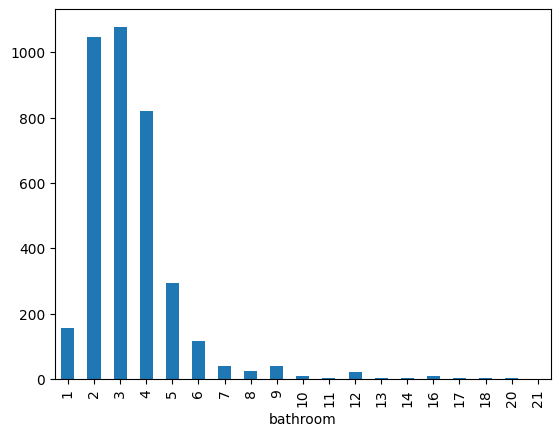

In [42]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

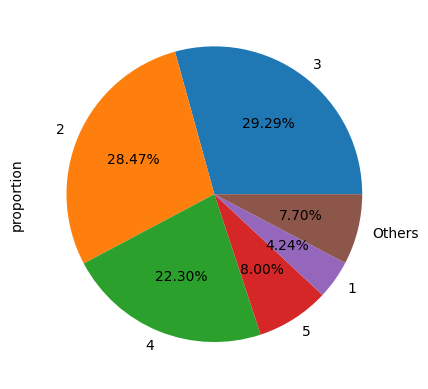

In [43]:
counts = df['bathroom'].value_counts(normalize=True)
top5 = counts.head()
others = 1 - top5.sum()

if others > 0:
    top5['Others'] = others  # add remaining part

top5.plot(kind='pie', autopct='%0.2f%%')


# balcony

In [44]:
df['balcony'].isnull().sum()

0

In [45]:
df['balcony'].value_counts()

balcony
3+    1172
3     1074
2      884
1      365
0      182
Name: count, dtype: int64

<Axes: xlabel='balcony'>

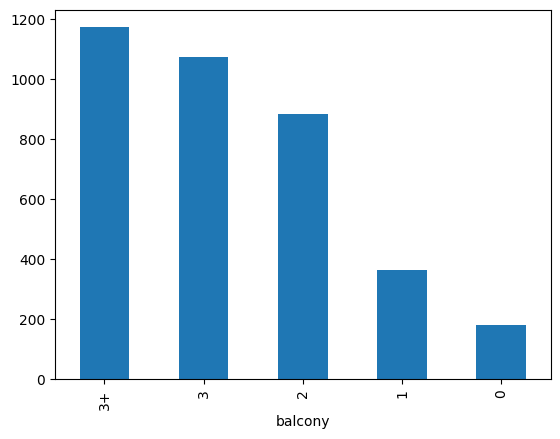

In [46]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

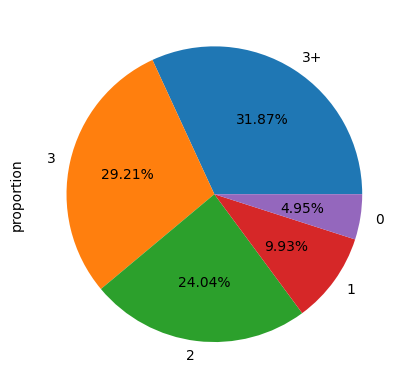

In [47]:
df['balcony'].value_counts(normalize=True).plot(kind='pie',autopct='%0.2f%%')

# floorNum

In [48]:
df['floorNum'].isnull().sum()

19

In [49]:
df['floorNum'].describe()

count    3658.000000
mean        6.798250
std         6.012454
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

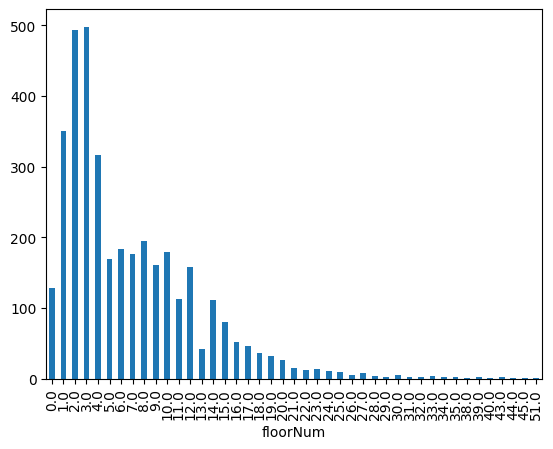

In [50]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='floorNum'>

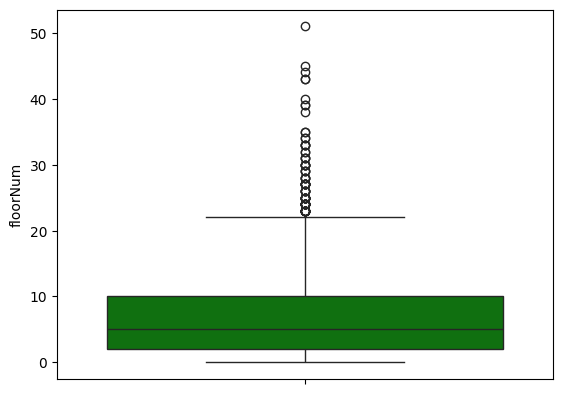

In [51]:
sns.boxplot(df['floorNum'],color='green')

- The majority of the properties lie between the ground floor (0) and the 25th floor.
- Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
- There are a few properties located at higher floors, but their frequency is much lower.
- The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
- Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

# facing

In [52]:
df['facing'].isnull().sum()

1045

In [53]:
df['facing'].fillna('NA',inplace=True)

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_2147/3692945726.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['facing'].fillna('NA',inplace=True)


In [54]:
df['facing'].value_counts()

facing
NA            1045
North-East     623
East           623
North          387
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: count, dtype: int64

# agePossession

In [55]:
df['agePossession'].isnull().sum()

0

In [56]:
df['agePossession'].value_counts()

agePossession
Relatively New        1646
New Property           593
Moderately Old         563
Undefined              306
Old Property           303
Under Construction     266
Name: count, dtype: int64

# areas

In [59]:
df['super_built_up_area'].isnull().sum()

1802

In [60]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

- most of the flats listed on website are of 1927 sqfts with min of 89 sqft, and max of 9999sqft

In [61]:
# built-up area 
df['built_up_area'].isnull().sum()

1987

In [62]:
df['built_up_area'].describe()

count      1690.000000
mean       2379.585816
std       17942.880237
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

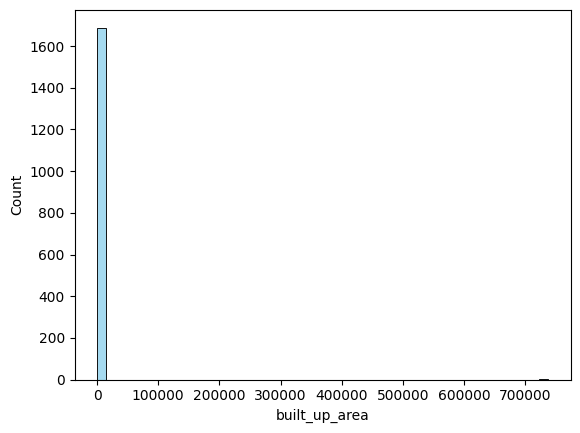

In [63]:
sns.histplot(df['built_up_area'].dropna(),bins=50,color='skyblue',kde=False)

<Axes: ylabel='built_up_area'>

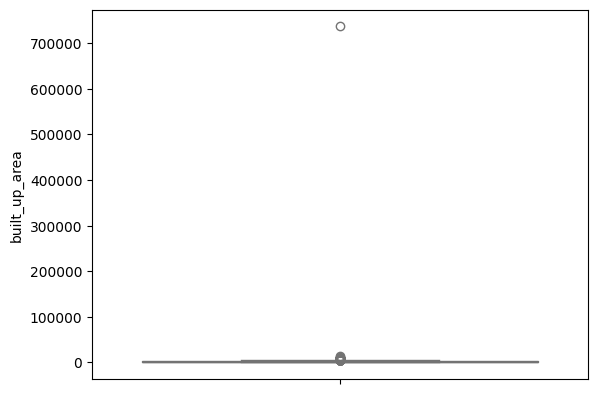

In [64]:
sns.boxplot(df['built_up_area'].dropna(),color='lightgreen')

There is data error not outliers problem

In [65]:
df['carpet_area'].describe()

count      1872.000000
mean       2529.179507
std       22799.836449
min          15.000000
25%         843.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

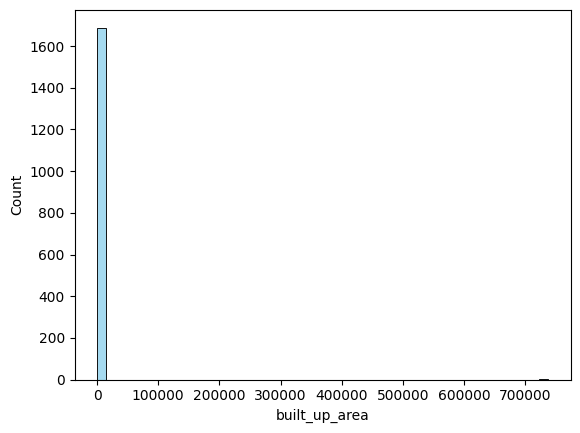

In [66]:
sns.histplot(df['built_up_area'].dropna(),bins=50,color='skyblue',kde=False)

<Axes: ylabel='built_up_area'>

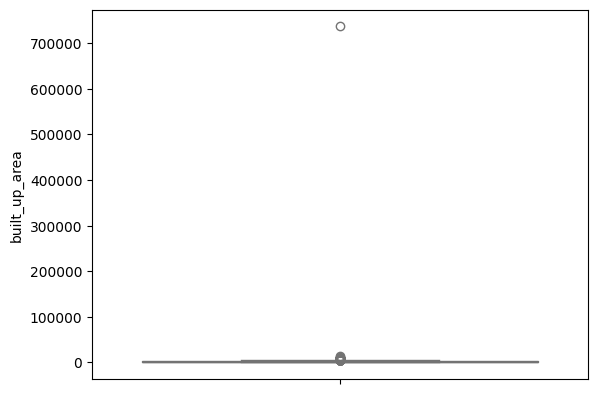

In [67]:
sns.boxplot(df['built_up_area'].dropna(),color='lightgreen')

In [68]:
df.iloc[:,15:]

,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,0,0,0,0,1,72
1,0,0,0,0,0,2,51
2,0,0,0,0,1,1,149
3,0,0,0,0,0,1,157
4,0,1,0,1,0,2,49
...,...,...,...,...,...,...,...
3798,0,1,0,0,0,1,49
3799,1,0,0,1,0,2,142
3800,0,0,0,0,0,2,96
3801,0,0,0,0,0,1,8


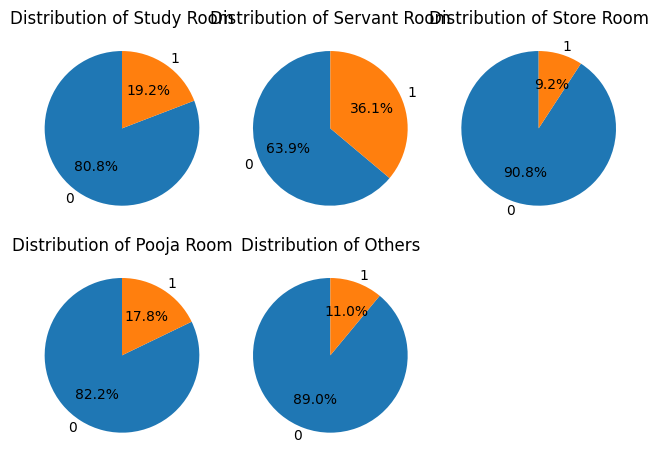

In [69]:
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'],1):
    ax = plt.subplot(2,3,idx) 
    df[room].value_counts().plot.pie(autopct='%1.1f%%',startangle=90,ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

# furnishing type


In [70]:
df['furnishing_type'].value_counts()

furnishing_type
1    2436
2    1038
0     203
Name: count, dtype: int64

<Axes: ylabel='count'>

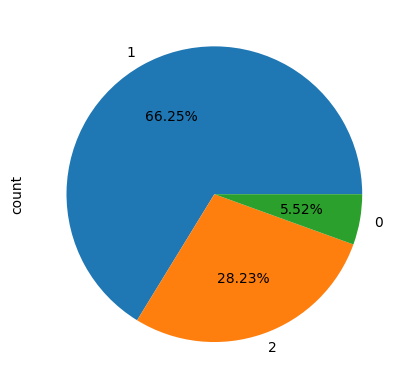

In [71]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

- 2 = semi-furnished flats
- 1 = unfurnished flats
- 0 = furnished flats

# Luxury score

In [72]:
df['luxury_score'].isnull().sum()

0

In [73]:
df['luxury_score'].describe()

count    3677.000000
mean       71.512918
std        53.059082
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

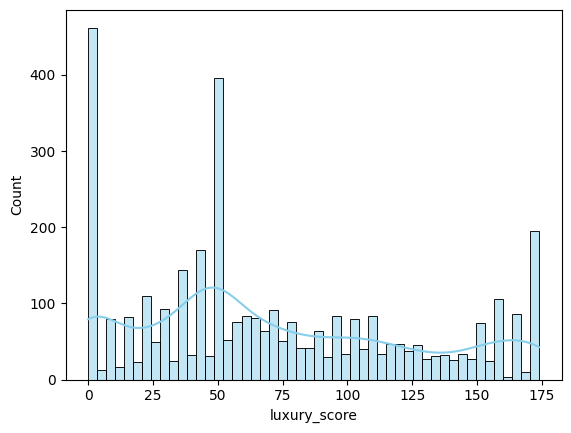

In [74]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue',kde=True)

<Axes: ylabel='luxury_score'>

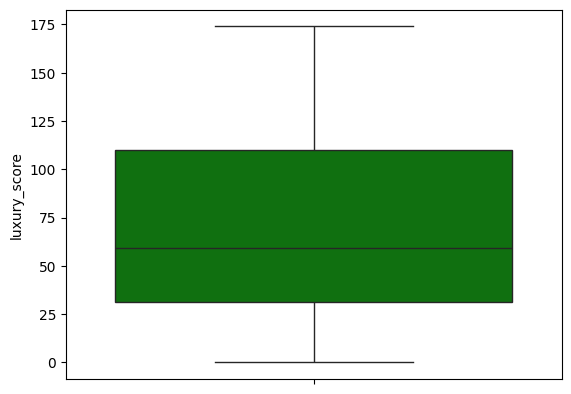

In [75]:
sns.boxplot(df['luxury_score'],color='green')

the boxplot shows that majority of the flats have score betwen 27-115 approximately

#### Overall Conclusion

1. there is significant number of missing values in the data
2. there are outliers to large extent as well